In [4]:
# Libraries

import warnings                    ## Handling warnings
import numpy as np                 ## linear algebra
import pandas as pd                ## data processing
import matplotlib.pyplot as plt    ## visualization
import seaborn as sns              ## visualization
!pip install optuna
import optuna as opt               ## Hyperparameters

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, mean_squared_error, mean_absolute_error

# Display options
pd.set_option('display.max_columns', 30)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Files
df = pd.read_csv(r"/content/train.csv")
dftest = pd.read_csv(r"/content/test.csv")
df_test = dftest.copy()

# **Data Exploration**

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
categorical_variables = df.select_dtypes(include = ["object","bool"])
numerical_variables = df.select_dtypes(include =["float64"])

**Distributions**
In this section, the distribution of each variable is examined using visualizations and descriptive statistics. Additionally, the correlations between the variables are studied to understand the relationships between them.

**Numerical columns**

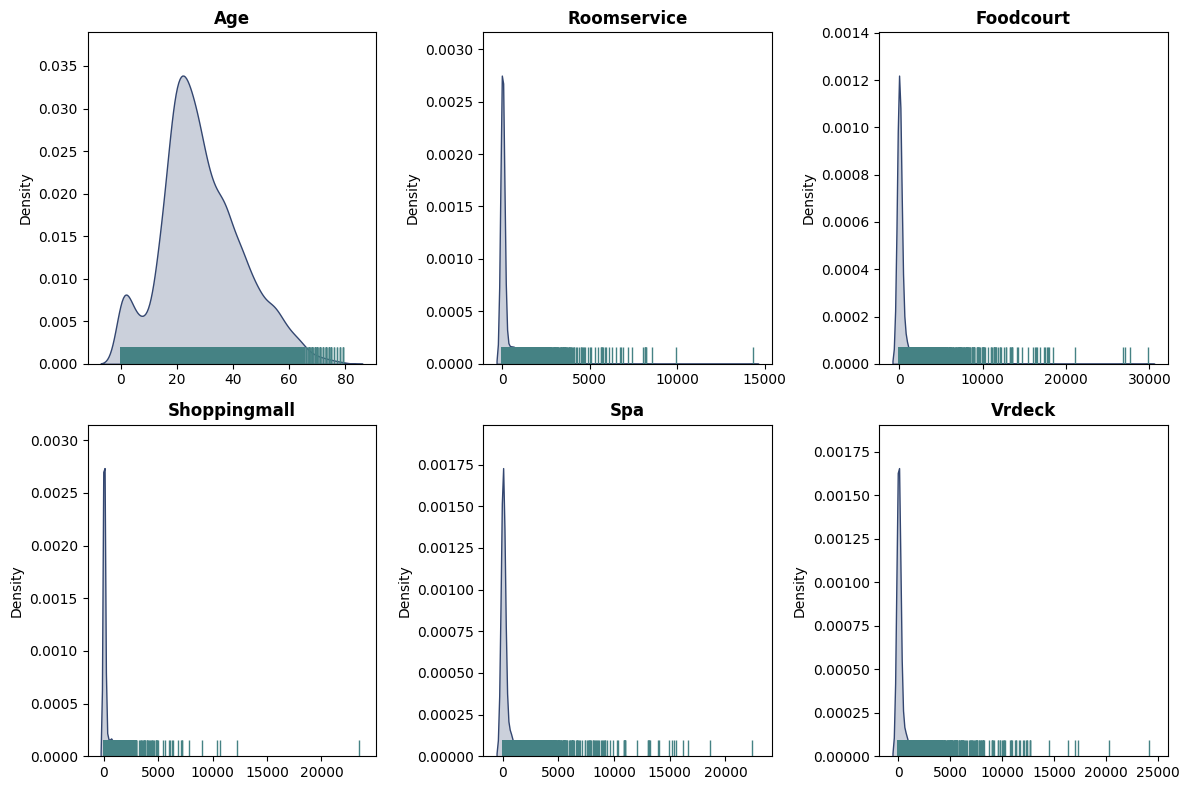

In [10]:
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated')
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(12, 8))
ax = ax.flatten()
numerical_variables.replace([float('inf'),float('-inf')], np.nan, inplace=True)
for i,column in enumerate(numerical_variables.columns):
    sns.kdeplot(numerical_variables[column], ax=ax[i],color = "#334670", fill=True)
    sns.rugplot(numerical_variables[column], ax=ax[i],color="#458284", height=0.05, expand_margins=True)
    ax[i].set_title(f"{column.capitalize()}", fontweight="bold")
    ax[i].set_xlabel("")
plt.tight_layout()
plt.show()


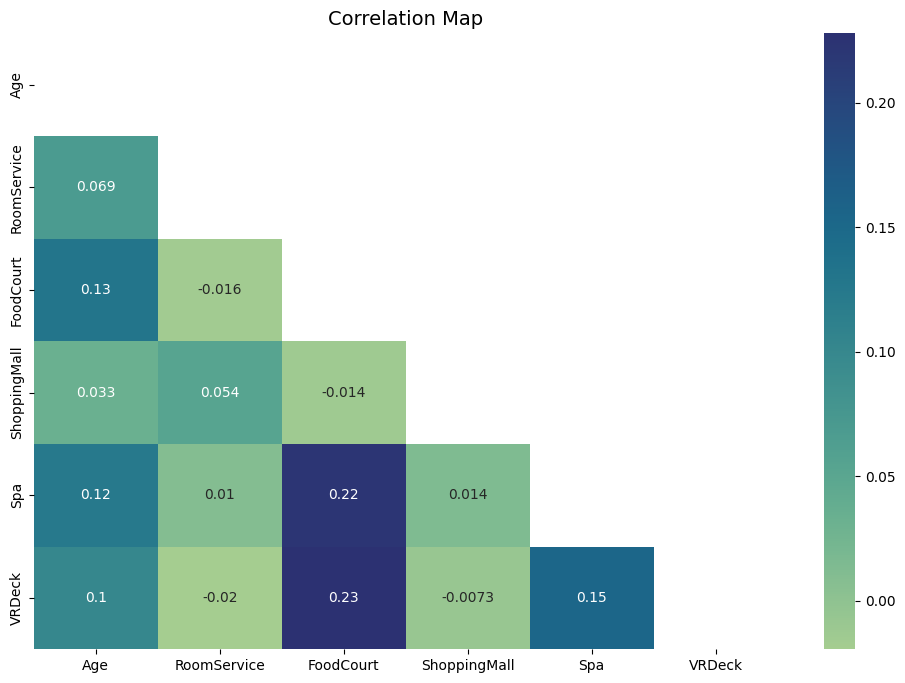

In [11]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(numerical_variables.corr(), dtype=bool))
sns.heatmap(numerical_variables.corr(), cmap="crest", annot=True, mask=mask)
plt.title("Correlation Map", fontsize=14)
plt.show()

**Categorical columns**

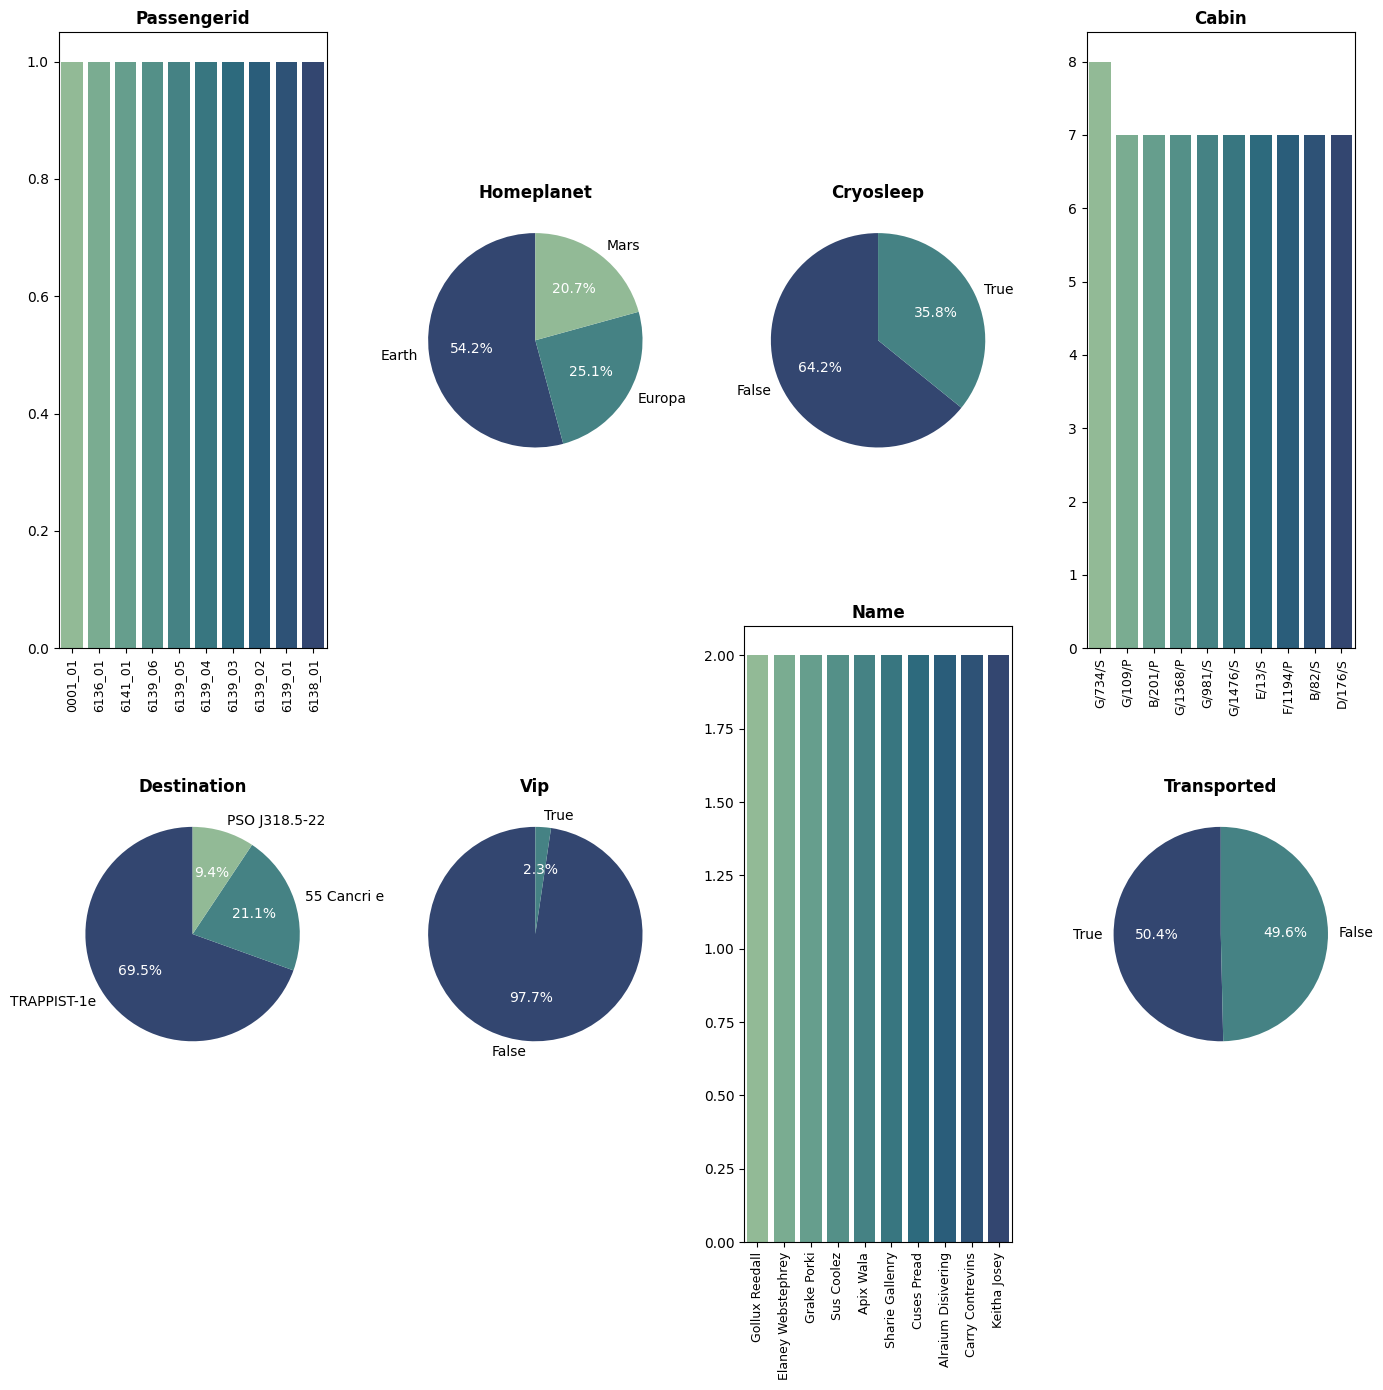

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14,14))
ax = ax.flat

for i,column in enumerate(categorical_variables.columns):
    if len(df[column].unique()) > 6:
        sns.barplot(x=categorical_variables[column].value_counts().head(10).index,
                    y=categorical_variables[column].value_counts().head(10),ax=ax[i], palette="crest")
        ax[i].tick_params(axis='x', rotation=90, labelsize=9)
        ax[i].set_title(column.capitalize(), fontweight="bold")
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
    else:
        x, x_, autotexts = ax[i].pie(df[column].value_counts(), labels=df[column].value_counts().index,
                           autopct= '%1.1f%%', startangle=90, colors=["#334670","#458284","#92ba96"], radius=1)
        for autotext in autotexts:
            autotext.set_color('white')
        ax[i].set_title(column.capitalize(), fontweight="bold")
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")

plt.tight_layout()
plt.show()

del numerical_variables,categorical_variables

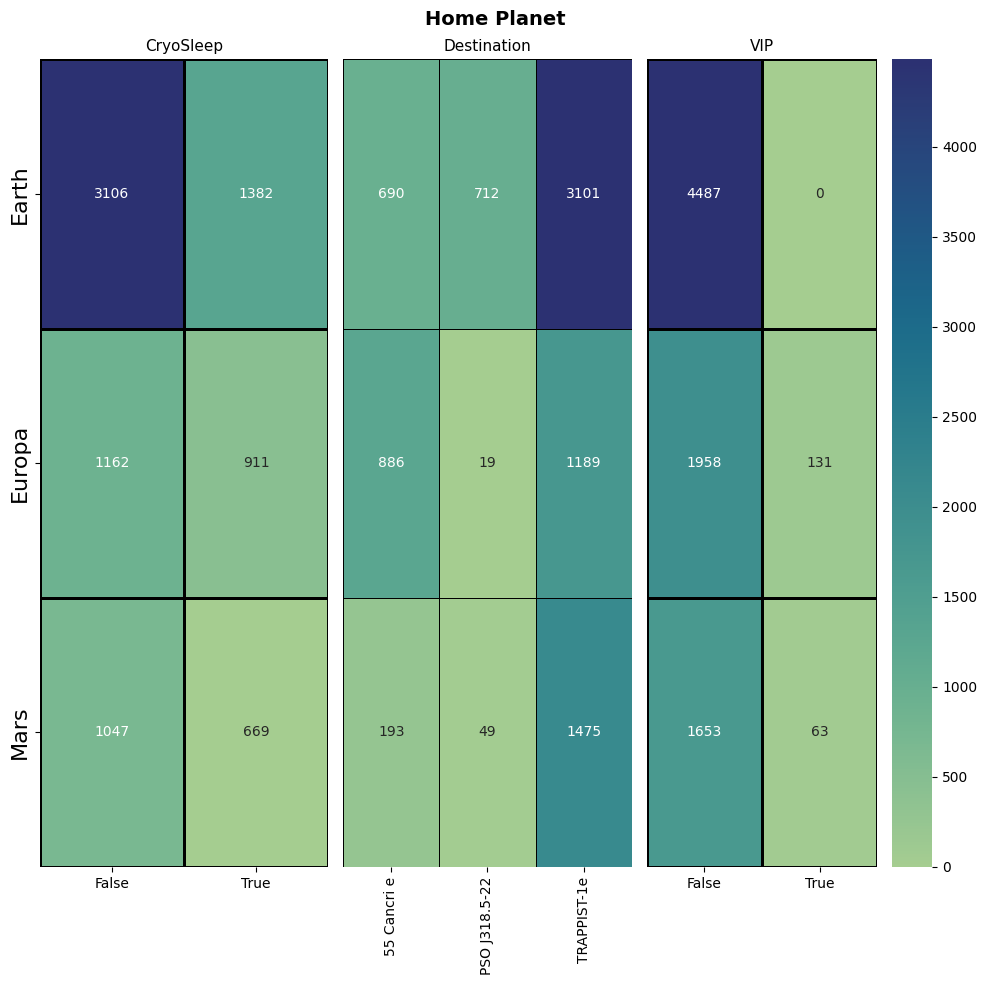

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
ax = ax.flat
plt.suptitle("Home Planet", fontsize=14, fontweight="bold")

contingency_table = pd.crosstab(index=df['HomePlanet'], columns=df["CryoSleep"])
sns.heatmap(contingency_table, annot=True, cmap="crest", fmt=".0f",cbar=False,annot_kws={"size": 10}, ax=ax[0],
            linewidths=1, linecolor='black')
ax[0].set_title('CryoSleep', fontsize=11)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_yticklabels(contingency_table.index,fontsize=16)

contingency_table = pd.crosstab(index=df['HomePlanet'], columns=df["Destination"])
sns.heatmap(contingency_table, annot=True, cmap="crest", fmt=".0f",annot_kws={"size": 10}, ax=ax[1], cbar=False,
           linewidths=0.7, linecolor='black')
ax[1].set_title('Destination', fontsize=11)
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_yticks([])

contingency_table = pd.crosstab(index=df['HomePlanet'], columns=df["VIP"])
sns.heatmap(contingency_table, annot=True, cmap="crest", fmt=".0f",annot_kws={"size": 10}, ax=ax[2],
           linewidths=1, linecolor='black')
ax[2].set_title('VIP', fontsize=11)
ax[2].set_xlabel("")
ax[2].set_ylabel("")
ax[2].set_yticks([])

plt.tight_layout()
plt.show()

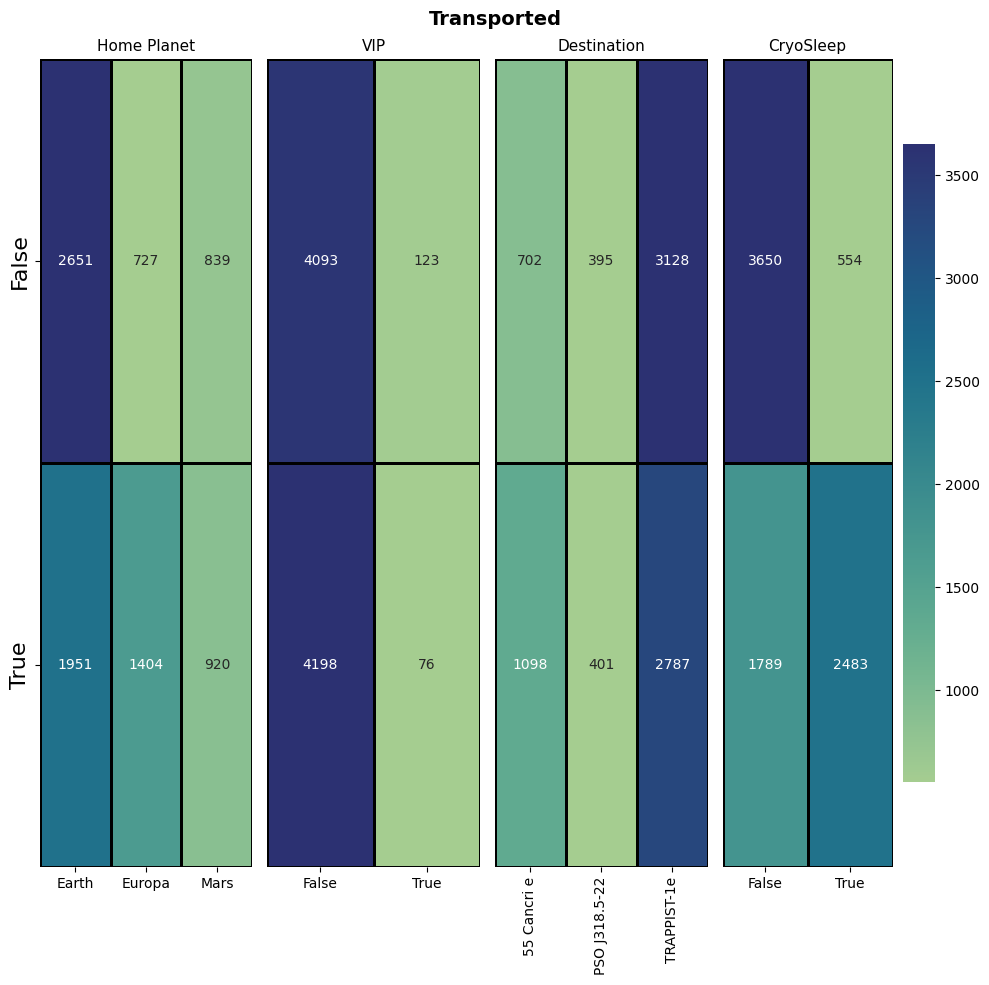

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
ax = ax.flat
plt.suptitle("Transported", fontsize=14, fontweight="bold")

contingency_table = pd.crosstab(index=df['Transported'], columns=df["HomePlanet"])
sns.heatmap(contingency_table, annot=True, cmap="crest", fmt=".0f",cbar=False,annot_kws={"size": 10}, ax=ax[0],
           linewidths=1, linecolor='black')
ax[0].set_title('Home Planet', fontsize=11)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_yticklabels(contingency_table.index,fontsize=16)

contingency_table = pd.crosstab(index=df['Transported'], columns=df["VIP"])
sns.heatmap(contingency_table, annot=True, cmap="crest", fmt=".0f",annot_kws={"size": 10}, ax=ax[1], cbar=False,
           linewidths=1, linecolor='black')
ax[1].set_title('VIP', fontsize=11)
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_yticks([])

contingency_table = pd.crosstab(index=df['Transported'], columns=df["Destination"])
sns.heatmap(contingency_table, annot=True, cmap="crest", fmt=".0f",annot_kws={"size": 10},cbar=False, ax=ax[2],
           linewidths=1, linecolor='black')
ax[2].set_title('Destination', fontsize=11)
ax[2].set_xlabel("")
ax[2].set_ylabel("")
ax[2].set_yticks([])

contingency_table = pd.crosstab(index=df['Transported'], columns=df["CryoSleep"])
sns.heatmap(contingency_table, annot=True, cmap="crest", fmt=".0f",annot_kws={"size": 10}, ax=ax[3],
           linewidths=1, linecolor='black')
ax[3].set_title('CryoSleep', fontsize=11)
ax[3].set_xlabel("")
ax[3].set_ylabel("")
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

Now we explore the number of null values by column



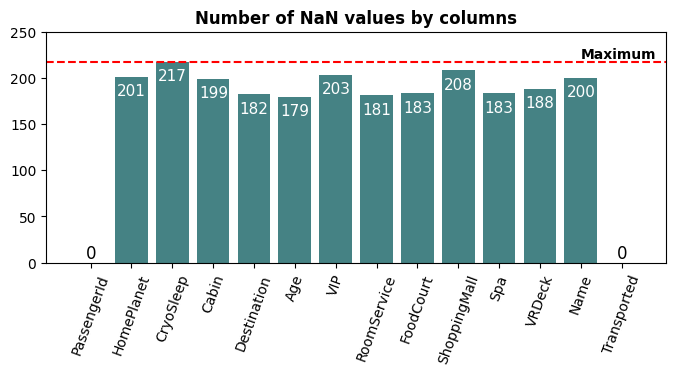

In [15]:
# List with the number of nulls by column
missing_data = []
# Reading the number of nulls
for column in df.columns:
    missing_data.append(df[column].isna().sum())
# Graph
plt.figure(figsize=(8,3))
plt.bar(x=df.columns,height= missing_data, color="#458284")
plt.axhline(max(missing_data), color="Red", linestyle = "dashed")
plt.text(12, max(missing_data)*1.02, "Maximum", color='Black', weight="bold")
for i in range(len(df.columns)):
    if i == 0 or i == 13:
        plt.text(i-0.11, 5, str(missing_data[i]), color="Black", fontsize=12)
    else:
        plt.text(i-.35, missing_data[i]-20, str(missing_data[i]), color="white", fontsize=11)
plt.title("Number of NaN values by columns", fontweight="bold")
plt.xticks(rotation=70)
plt.ylim(0,250)
plt.show()

del missing_data

At this point we need to know if all the null values are from the same rows or from others. If we have a case where the data comes from different rows we have to deal with thounsands of null records.

In [16]:
# Index of each null records
ans = []
for column in df.columns:
        nan_indexes = df.index[df[column].isnull()].to_list()
        ans.extend(nan_indexes)
ans = np.unique(ans)
print(f"The number of rows with null values is: {len(ans)}")
del ans

The number of rows with null values is: 2087


We now know that we need to addres 2087 null records in the entire training dataset with the CryoSleep column containing the maximum number of null records: 217.
Our dataset has values that can be better worked on separately.

We can start with the Cabin column that has 3 types of data in its records: Decks, Number of Deck and Sides.

In [17]:
cabin_df = pd.DataFrame(columns=["Deck", "Num", "Side"])
cabin_df_test = pd.DataFrame(columns=["Deck", "Num", "Side"])

for n in df["Cabin"]:
    if n is np.nan:
        new_row = pd.DataFrame({'Deck': [np.nan], 'Num': [np.nan], "Side":[np.nan]})
        cabin_df = pd.concat([cabin_df,new_row], ignore_index=True)
    else:
        deck, num, side = str(n).split('/')
        new_row = pd.DataFrame({'Deck': [deck], 'Num': [int(num)], "Side":[side]})
        cabin_df = pd.concat([cabin_df,new_row], ignore_index=True)

for n in df_test["Cabin"]:
    if n is np.nan:
        new_row = pd.DataFrame({'Deck': [np.nan], 'Num': [np.nan], "Side":[np.nan]})
        cabin_df_test = pd.concat([cabin_df_test,new_row], ignore_index=True)
    else:
        deck, num, side = str(n).split('/')
        new_row = pd.DataFrame({'Deck': [deck], 'Num': [int(num)], "Side":[side]})
        cabin_df_test = pd.concat([cabin_df_test,new_row], ignore_index=True)

Also we can separate the PassengerId column to work with its values separately.

In [18]:
passeger_id_df = pd.DataFrame(columns=["Group", "Member"])
passeger_id_df_test = pd.DataFrame(columns=["Group", "Member"])

for n in df["PassengerId"]:
    group, member = str(n).split("_")
    new_row = pd.DataFrame({'Group': [group], 'Member': [int(member)]})
    passeger_id_df = pd.concat([passeger_id_df,new_row], ignore_index=True)

for n in df_test["PassengerId"]:
    group, member = str(n).split("_")
    new_row = pd.DataFrame({'Group': [group], 'Member': [int(member)]})
    passeger_id_df_test = pd.concat([passeger_id_df_test,new_row], ignore_index=True)

To create the new dataframe with our separate columns, we will use the dataframes resulting in the previous steps.

In [19]:
# Removing columns to replace them
df.drop(columns=["PassengerId"], inplace=True)
df_test.drop(columns=["PassengerId"], inplace=True)
# Creating the new dataframe
df = pd.concat([passeger_id_df, df, cabin_df],axis=1)
df_test = pd.concat([passeger_id_df_test, df_test, cabin_df_test],axis=1)
# Reorganizing the order of the columns
df = df.reindex(['Group','Member','HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'], axis=1)
df_test = df_test.reindex(['Group','Member','HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis=1)

df["Member"] = df["Member"].astype(float)
df["Num"] = df["Num"].astype(float)
df_test["Member"] = df_test["Member"].astype(float)
df_test["Num"] = df_test["Num"].astype(float)

del passeger_id_df, cabin_df, passeger_id_df_test, cabin_df_test

In [20]:
df.head()

,Group,Member,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001,1.0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002,1.0,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003,1.0,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003,2.0,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004,1.0,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [21]:
df_test.head()

,Group,Member,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013,1.0,Earth,True,G,3.0,S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018,1.0,Earth,False,F,4.0,S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019,1.0,Europa,True,C,0.0,S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021,1.0,Europa,False,C,1.0,S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023,1.0,Earth,False,F,5.0,S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [22]:
display(df.head())

,Group,Member,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001,1.0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002,1.0,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003,1.0,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003,2.0,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004,1.0,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# **Data Cleaning**

With our structured data we can work with the null values.

To addres the numerical values we need to see the mean an the median and with that we will select the values to fill the Nulls.

For the categorical values we will use the category with the highest frequency.

Also there are some columns in which we cannot generate data to fill these, since they are unique records and cannot be duplicated such as Names, therefore they will be eliminated.

**Numerical records**

In [23]:
df.describe().T.style.bar(subset=["count"], color="#33858d").bar(subset=["mean", "50%"], color = "brown")

,count,mean,std,min,25%,50%,75%,max
Member,8693.000000,1.517773,1.054241,1.000000,1.000000,1.000000,2.000000,8.000000
Num,8494.000000,600.367671,511.867226,0.000000,167.250000,427.000000,999.000000,1894.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000


Based on this table above, the values to fill the Nulls will be the values from the Median ("50%") column.

**Age**
The data used to fill in null values will be: "29"

In [24]:
df.fillna({"Age":29}, inplace=True)

**Room Service, Food Court, ShoppingMall, Spa, VRDeck**
For all these columns the value to fill the nulls will be the same: "0"

In [25]:
df.fillna({"RoomService":0}, inplace=True)
df.fillna({"FoodCourt":0}, inplace=True)
df.fillna({"ShoppingMall":0}, inplace=True)
df.fillna({"Spa":0}, inplace=True)
df.fillna({"VRDeck":0}, inplace=True)

**Categorical records**

**HomePlanet**

The data used to fill in null values will be: "Earth"

In [26]:
df.fillna({"HomePlanet":"Earth"}, inplace=True)

**CryoSleep**

The data used to fill in null values will be: False

In [27]:
df.fillna({"CryoSleep":False}, inplace=True)

**Cabin (Deck, Num and Side) columns**

To adress the null values from this columns we will use the records of the same groups, if a passenger has the same group number the information about his deck, num and side will be the same in most cases.

In [28]:
# Procedure to replace the null values with the values of the same group

# Null values Cabin column
values =df[df["Deck"].isnull()]["Group"].tolist()
count = 0
# loop through the null records
for value in values:
    filtered = df[df["Group"] ==value][["Deck", "Num", "Side",]]
    filtered = filtered.dropna()
    # Filter to ensure there are more than 1 record with same Group Number.
    if not filtered.empty:
        deck = filtered["Deck"].unique()
        num = filtered["Num"].unique()
        side = filtered["Side"].unique()
        # Selecting only the groups with identical information.
        if not len(deck) > 1:
            rows = df[df["Group"] == value]
            rows_nan = rows[rows["Deck"].isna()].index
            rows.loc[rows_nan, "Deck"] = deck
            rows.loc[rows_nan, "Num"]  = num
            rows.loc[rows_nan, "Side"] = side
            df.loc[df["Group"] == value] = rows
            count += 1
# Drop the null values that cannot be cleaned.
df.dropna(subset=["Deck", "Num", "Side"], inplace=True)
print(f"The number of values cleaned is: {count}")
del values, count

The number of values cleaned is: 87


In [29]:
df.head()

,Group,Member,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001,1.0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002,1.0,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003,1.0,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003,2.0,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004,1.0,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


We clean only 87 records for 2 reasons:

There are many records that only have 1 entry so we cannot compare data from other within the same group.
Another scenario is that there a few records with too many entries and there is no relationship among those records.

**Destination**

The data used to fill in null values will be: "TRAPPIST-1e"

In [30]:
df.fillna({"Destination":"TRAPPIST-1e"}, inplace=True)

**VIP**

The data used to fill in null values will be: "False

In [31]:
df.fillna({"VIP":False}, inplace=True)

**Name**

Due to this column having unique values that cannot be predicted, records with null values will be removed.

In [32]:
df.drop(columns="Name", inplace=True)
df_test.drop(columns="Name", inplace=True)

**Results of data cleaning**

In [33]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8581 entries, 0 to 8580
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Group         8581 non-null   object 
 1   Member        8581 non-null   float64
 2   HomePlanet    8581 non-null   object 
 3   CryoSleep     8581 non-null   bool   
 4   Deck          8581 non-null   object 
 5   Num           8581 non-null   float64
 6   Side          8581 non-null   object 
 7   Destination   8581 non-null   object 
 8   Age           8581 non-null   float64
 9   VIP           8581 non-null   bool   
 10  RoomService   8581 non-null   float64
 11  FoodCourt     8581 non-null   float64
 12  ShoppingMall  8581 non-null   float64
 13  Spa           8581 non-null   float64
 14  VRDeck        8581 non-null   float64
 15  Transported   8581 non-null   bool   
dtypes: bool(3), float64(8), object(5)
memory usage: 896.8+ KB


# **Preprocessing**

**Label Encoding**

Since Machine Learning models require numerical data, our next step will be encoding our categorical variables into numeric values.

In [34]:
# To encode the categories with many values we will use the LabelEncoder
encoder = LabelEncoder()

df["Group"] = encoder.fit_transform(df["Group"])
df_test["Group"] = encoder.fit_transform(df_test["Group"])
##df["HomePlanet"] = encoder.fit_transform(df["HomePlanet"]) ##
df["Deck"] = encoder.fit_transform(df["Deck"])
df_test["Deck"] = encoder.fit_transform(df_test["Deck"])
##df["Side"] = encoder.fit_transform(df["Side"])  ##
##df["Destination"] = encoder.fit_transform(df["Destination"]) ##
df["Transported"] = encoder.fit_transform(df["Transported"])
df["CryoSleep"] = df["CryoSleep"].replace({False:0, True:1})
df_test["CryoSleep"] = df_test["CryoSleep"].replace({False:0, True:1})
df["VIP"] = df["VIP"].replace({False:0, True:1})
df_test["VIP"] = df_test["VIP"].replace({False:0, True:1})

In [35]:
df.head()

,Group,Member,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1.0,Europa,0,1,0.0,P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,1.0,Earth,0,5,0.0,S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,2,1.0,Europa,0,0,0.0,S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,2,2.0,Europa,0,0,0.0,S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,3,1.0,Earth,0,5,1.0,S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [36]:
df_test.head()

,Group,Member,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1.0,Earth,1.0,6,3.0,S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,Earth,0.0,5,4.0,S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,2,1.0,Europa,1.0,2,0.0,S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,Europa,0.0,2,1.0,S,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,4,1.0,Earth,0.0,5,5.0,S,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0


There are some columns that can be more practical to work with them as dummies.

In [37]:
homeplanet = pd.get_dummies(df["HomePlanet"], dtype=int)
homeplanet_test = pd.get_dummies(df_test["HomePlanet"], dtype=int)
side = pd.get_dummies(df["Side"], dtype=int)
side_test = pd.get_dummies(df_test["Side"], dtype=int)
destination = pd.get_dummies(df["Destination"], dtype=int)
destination_test = pd.get_dummies(df_test["Destination"], dtype=int)
df.drop(columns=["HomePlanet", "Side", "Destination"], inplace=True)
df_test.drop(columns=["HomePlanet", "Side", "Destination"], inplace=True)

Next we concatenate the values from the encodings and the dummies dataframes.

In [38]:
df_final = pd.concat([df, homeplanet, side, destination], axis=1,ignore_index=True)
df_final_test = pd.concat([df_test, homeplanet_test, side_test, destination_test], axis=1,ignore_index=True)
df_final.columns =  ['Group', 'Member', 'CryoSleep', 'Deck', 'Num', 'Age', 'VIP', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck', 'Transported','Earth', 'Europa', 'Mars','Port', 'Starboard',
                     '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']
df_final_test.columns =  ['Group', 'Member', 'CryoSleep', 'Deck', 'Num', 'Age', 'VIP', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck','Earth', 'Europa', 'Mars','Port', 'Starboard',
                     '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']
new_order = ['Group', 'Member', 'CryoSleep','Earth', 'Europa', 'Mars', 'Deck', 'Num','Port', 'Starboard', '55 Cancri e',
             'PSO J318.5-22', 'TRAPPIST-1e','Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
             'VRDeck', 'Transported']
new_order_test = ['Group', 'Member', 'CryoSleep','Earth', 'Europa', 'Mars', 'Deck', 'Num','Port', 'Starboard', '55 Cancri e',
             'PSO J318.5-22', 'TRAPPIST-1e','Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
             'VRDeck']
df_final = df_final[new_order]
df_final_test = df_final_test[new_order_test]

del homeplanet, homeplanet_test, side, side_test, destination, destination_test, new_order

In [39]:
df_final.drop(columns=['Num'], inplace=True) # Drop the 'Cabin' column

**Data Balance**

The data balance refers to the distribution of observations among the different classes of the target variable in a dataset. It is important because it affects the model performance and prediction accuracy. An imbalance in the distribution can lead to biased models and difficulties in generalization.

In [40]:
df_final["Transported"].value_counts()

Transported
1    4328
0    4253
Name: count, dtype: int64

As we can observe our target variables is balanced, so we can continue.

**Spliting Data**

The first fit will be performed using the data from the 'train.csv' set, so the set will be split between the training data and the test data.

In [41]:
X = df_final.drop(columns=["Transported"])
y = df_final.Transported

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

**Data Normalization**

The data normalization process will scale the data to a fixed range, typically between 0 and 1, using the Min Max scaling method. This ensures that all features have the same scale and prevents features with larger scales from dominating the model. After normalization, each feature will have a range between 0 and 1.

In [43]:
mms = MinMaxScaler()

X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [44]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,Group,Member,CryoSleep,Earth,Europa,Mars,Deck,Port,Starboard,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.197809,0.285714,0.0,1.0,0.0,0.0,0.857143,0.0,1.0,0.0,0.0,1.0,0.101266,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.114926,0.000000,0.0,1.0,0.0,0.0,0.571429,1.0,0.0,1.0,0.0,0.0,0.316456,0.0,0.009201,0.023782,0.0,0.000000,0.000000
2,0.392186,0.142857,0.0,1.0,0.0,0.0,0.714286,0.0,1.0,0.0,0.0,1.0,0.189873,0.0,0.000000,0.013350,0.0,0.020841,0.000000
3,0.256662,0.142857,1.0,0.0,1.0,0.0,0.285714,0.0,1.0,0.0,0.0,1.0,0.215190,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.133726,0.000000,0.0,0.0,1.0,0.0,0.285714,1.0,0.0,1.0,0.0,0.0,0.544304,0.0,0.158980,0.104183,0.0,0.002231,0.095844


In [45]:
pd.DataFrame(X_test_scaled, columns=X_test.columns).head()

,Group,Member,CryoSleep,Earth,Europa,Mars,Deck,Port,Starboard,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.465097,0.000000,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.594937,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.838319,0.000000,0.0,1.0,0.0,0.0,0.714286,1.0,0.0,0.0,0.0,1.0,0.303797,0.0,0.163638,0.000000,0.000596,0.000089,0.006754
2,0.459212,0.000000,1.0,1.0,0.0,0.0,0.857143,1.0,0.0,0.0,0.0,1.0,0.164557,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.318620,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.329114,0.0,0.238761,0.285949,0.000000,0.012049,0.026354
4,0.406408,0.142857,0.0,0.0,0.0,1.0,0.428571,0.0,1.0,0.0,0.0,1.0,0.531646,0.0,0.106336,0.000134,0.000043,0.065378,0.000000


# **Model Selection and Fitting**

In this section, various models are compared and fit to determine the most suitable one. This fitting is performed to evaluate and compare the performance of each model and select the most effective one from a predefined list.

In [46]:
models = [
    LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs'),
    DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None),
    RandomForestClassifier(n_estimators=238, max_depth=11, min_samples_split=6, min_samples_leaf=1, max_features='sqrt'),
    GradientBoostingClassifier(n_estimators=311, learning_rate=0.01692577483678813, max_depth=10, min_samples_split=10, min_samples_leaf=7, max_features="log2"),
    AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    SVC(C=1.0, kernel='rbf', gamma='scale'),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    XGBClassifier(n_estimators=352, learning_rate=0.04452171134956829,max_depth=11, min_child_weight=6, subsample=0.9596728088879581,colsample_bytree= 0.7321413461163211,gamma = 0.8573592725441669, reg_alpha = 0.9485599370172857, reg_lambda = 0.859332304288036)
]

In [47]:
# Adjustaing models
results = None
cv = KFold(n_splits=7)

for i, model in enumerate(models):
    # Cross validation
    scores = cross_val_score(model,X_train_scaled, y_train, cv=cv)
    mean = scores.mean()
    stdev = scores.std()

    # Adjusting model
    model = model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluating model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    row = pd.DataFrame({
                "model":type(model).__name__,
                "mean":mean,
                "lower_limit":mean-2*stdev,
                "upper_limit":mean+2*stdev,
                "MAE":mae,
                "MSE":mse,
                "Accuracy":accuracy,
                "Precision":precision,
                "Recall":recall,
                "F1":f1,
                "R_positives":conf_matrix[0][0],
                "F_positives":conf_matrix[0][1],
                "R_negatives":conf_matrix[1][1],
                "F_negatives":conf_matrix[1][0]}, index = [i])
    results = pd.concat([results, row], ignore_index=True)


In [48]:
results.style.bar(subset=['mean', 'MAE', 'Accuracy', 'F1'], cmap='crest')

,model,mean,lower_limit,upper_limit,MAE,MSE,Accuracy,Precision,Recall,F1,R_positives,F_positives,R_negatives,F_negatives
0,LogisticRegression,0.768270,0.748424,0.788117,0.258540,0.258540,0.741460,0.776596,0.679070,0.724566,517,126,438,207
1,DecisionTreeClassifier,0.743453,0.715456,0.771450,0.260870,0.260870,0.739130,0.744076,0.730233,0.737089,481,162,471,174
2,RandomForestClassifier,0.802411,0.771147,0.833674,0.206522,0.206522,0.793478,0.789313,0.801550,0.795385,505,138,517,128
3,GradientBoostingClassifier,0.808170,0.780881,0.835458,0.212733,0.212733,0.787267,0.793049,0.778295,0.785603,512,131,502,143
4,AdaBoostClassifier,0.794321,0.766783,0.821859,0.223602,0.223602,0.776398,0.760584,0.807752,0.783459,479,164,521,124
5,SVC,0.753874,0.735592,0.772156,0.255435,0.255435,0.744565,0.805019,0.646512,0.717111,542,101,417,228
6,KNeighborsClassifier,0.740984,0.714952,0.767016,0.277950,0.277950,0.722050,0.745299,0.675969,0.708943,494,149,436,209
7,GaussianNB,0.731799,0.717283,0.746315,0.286491,0.286491,0.713509,0.659722,0.883721,0.755467,349,294,570,75
8,XGBClassifier,0.807622,0.780342,0.834902,0.204193,0.204193,0.795807,0.794753,0.798450,0.796597,510,133,515,130


As we can see the best models for Accuracy are:

RandomForestClassifier
GradientBoostingClassifier
XGBClassifier
And the selected model for this proyect is the XGBClassifier

# **ablation**

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier

# Assume X_train and X_test are your original data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # This is now a numpy array
X_test_scaled = scaler.transform(X_test)  # This is now a numpy array

# Convert back to DataFrame to retain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize your classifier
clf = XGBClassifier(n_estimators=352, learning_rate=0.04452171134956829, max_depth=11, min_child_weight=6, subsample=0.9596728088879581, colsample_bytree=0.7321413461163211, gamma=0.8573592725441669, reg_alpha=0.9485599370172857, reg_lambda=0.859332304288036)

# Now you can perform the ablation study
results = None
cv = KFold(n_splits=7)
features = list(X_train_scaled.columns)

for feature in features:
    X_ablation = X_train_scaled.drop(feature, axis=1)

    # Cross validation
    scores = cross_val_score(clf, X_ablation, y_train, cv=cv)
    mean = scores.mean()
    stdev = scores.std()

    # Adjusting model
    clf.fit(X_ablation, y_train)
    y_pred = clf.predict(X_test_scaled.drop(feature, axis=1))

    # Evaluating model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    row = pd.DataFrame({
                "model":type(clf).__name__,
                "removed_feature": feature,
                "mean":mean,
                "lower_limit":mean-2*stdev,
                "upper_limit":mean+2*stdev,
                "MAE":mae,
                "MSE":mse,
                "Accuracy":accuracy,
                "Precision":precision,
                "Recall":recall,
                "F1":f1,
                "R_positives":conf_matrix[0][0],
                "F_positives":conf_matrix[0][1],
                "R_negatives":conf_matrix[1][1],
                "F_negatives":conf_matrix[1][0]}, index = [0])
    results = pd.concat([results, row], ignore_index=True)

# Visualize the results
results.style.bar(subset=['mean', 'MAE', 'Accuracy', 'F1'], color='lightblue')


,model,removed_feature,mean,lower_limit,upper_limit,MAE,MSE,Accuracy,Precision,Recall,F1,R_positives,F_positives,R_negatives,F_negatives
0,XGBClassifier,Group,0.806524,0.778757,0.834291,0.219720,0.219720,0.780280,0.771772,0.796899,0.784134,491,152,514,131
1,XGBClassifier,Member,0.806525,0.785583,0.827467,0.205745,0.205745,0.794255,0.794118,0.795349,0.794733,510,133,513,132
2,XGBClassifier,CryoSleep,0.800903,0.778667,0.823140,0.208075,0.208075,0.791925,0.797788,0.782946,0.790297,515,128,505,140
3,XGBClassifier,Earth,0.807759,0.781774,0.833743,0.201863,0.201863,0.798137,0.799378,0.796899,0.798137,514,129,514,131
4,XGBClassifier,Europa,0.807210,0.779141,0.835279,0.207298,0.207298,0.792702,0.793478,0.792248,0.792863,510,133,511,134
5,XGBClassifier,Mars,0.807348,0.783827,0.830869,0.203416,0.203416,0.796584,0.795981,0.798450,0.797214,511,132,515,130
6,XGBClassifier,Deck,0.800081,0.778210,0.821951,0.207298,0.207298,0.792702,0.793478,0.792248,0.792863,510,133,511,134
7,XGBClassifier,Port,0.806388,0.785695,0.827082,0.204969,0.204969,0.795031,0.796267,0.793798,0.795031,512,131,512,133
8,XGBClassifier,Starboard,0.806388,0.785695,0.827082,0.204969,0.204969,0.795031,0.796267,0.793798,0.795031,512,131,512,133
9,XGBClassifier,55 Cancri e,0.806936,0.782919,0.830952,0.203416,0.203416,0.796584,0.798752,0.793798,0.796267,514,129,512,133
